In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random

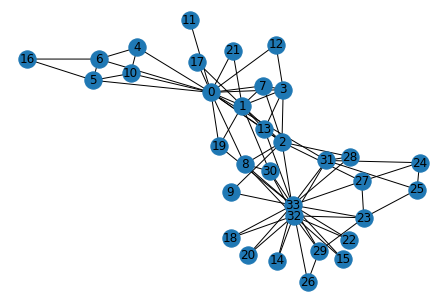

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

# plot the graph
nx.draw(G, pos=pos, with_labels=True)
plt.show()

# Data preparation

In [3]:
len(G.edges())

78

In [4]:
removed_edges = random.sample(list(G.edges()), 20)

for edge in removed_edges:
    G.remove_edge(edge[0], edge[1])
    
removed_edges

[(4, 6),
 (24, 27),
 (19, 33),
 (0, 12),
 (1, 13),
 (15, 33),
 (0, 10),
 (1, 17),
 (29, 32),
 (27, 33),
 (3, 7),
 (1, 30),
 (15, 32),
 (22, 33),
 (29, 33),
 (0, 11),
 (4, 10),
 (2, 28),
 (30, 32),
 (8, 30)]

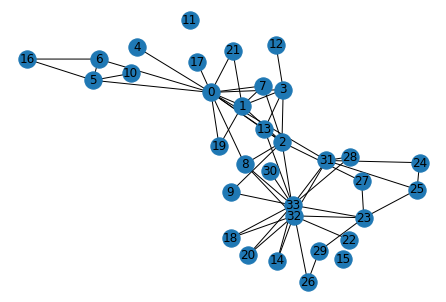

In [5]:
nx.draw(G, pos=pos, with_labels=True)
plt.show()

# Algorithms

## Jaccard coefficient

In [6]:
preds = nx.jaccard_coefficient(G)

# convert iterator to series
edges = list()
scores = list()
for u, v, p in preds:
    edges.append((u, v))
    scores.append(p)
    jc = pd.Series(scores, edges)
    
jc.sort_values(ascending=False)

(4, 17)     1.0
(19, 21)    1.0
(14, 20)    1.0
(14, 18)    1.0
(18, 20)    1.0
           ... 
(11, 19)    0.0
(11, 18)    0.0
(11, 17)    0.0
(11, 16)    0.0
(10, 11)    0.0
Length: 503, dtype: float64

## Adamic-Adar 

In [7]:
preds = nx.adamic_adar_index(G)

# convert iterator to series
edges = list()
scores = list()
for u, v, p in preds:
    edges.append((u, v))
    scores.append(p)
    aa = pd.Series(scores, edges)

aa.sort_values(ascending=False)

(2, 33)     3.340510
(29, 33)    2.064030
(0, 33)     2.000806
(2, 23)     1.897815
(23, 26)    1.845125
              ...   
(10, 28)    0.000000
(10, 27)    0.000000
(10, 26)    0.000000
(10, 25)    0.000000
(10, 11)    0.000000
Length: 503, dtype: float64

## Preferential attachment

In [8]:
preds = nx.preferential_attachment(G)

# convert iterator to series
edges = list()
scores = list()
for u, v, p in preds:
    edges.append((u, v))
    scores.append(p)
    pa = pd.Series(scores, edges)

pa.sort_values(ascending=False)    

(0, 33)     156
(0, 32)     117
(2, 33)     108
(1, 33)      72
(0, 23)      65
           ... 
(6, 11)       0
(6, 15)       0
(13, 15)      0
(12, 15)      0
(10, 11)      0
Length: 503, dtype: int64

# Evaluation

In [9]:
# Jaccard coefficient
count = 0

for edge in list(jc.sort_values(ascending=False)[:20].index):
    if edge in removed_edges:
        count += 1

print('Accuracy: {}'.format(count/len(removed_edges)))

Accuracy: 0.05


In [10]:
# Adamic-Adar
count = 0

for edge in list(aa.sort_values(ascending=False)[:20].index):
    if edge in removed_edges:
        count += 1

print('Accuracy: {}'.format(count/len(removed_edges)))

Accuracy: 0.15


In [11]:
# Preferential attachment
count = 0

for edge in list(pa.sort_values(ascending=False)[:20].index):
    if edge in removed_edges:
        count += 1

print('Accuracy: {}'.format(count/len(removed_edges)))

Accuracy: 0.0
